# The Calculation of Mean and Median Values of Tropical Precipitation 

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Calculation of mean of tropical precipitation   for ICON data](#2-calculation-of-mean-of-tropical-precipitation-for-icon-data)

3. [Calculation of median of tropical precipitation for IFS data](#3-calculation-of-median-of-tropical-precipitation-for-ifs-data)

4. [Plotting Function of Mean and Median values of Tropical Precipitation](#4-plotting-function-of-mean-and-median-values-of-tropical-precipitation)

   4.1 [Along the time coordinate](#41-along-the-time-coordinate)

   4.2 [Comparison of Mean and Median values](#42-comparison-of-mean-and-median-values)

   4.3 [Along longitude](#43-along-longitude)

   4.4 [Along latitude](#44-along-latitude)

   4.5 [Comparison of Mean Precipitation value for different tropical bands](#45-comparison-of-mean-precipitation-value-for-different-tropical-bands)

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../')
from tropical_rainfall_class import TR_PR_Diagnostic as TR_PR_Diag

FDB5 binary library not present on system, disabling FDB support.


In [2]:
from tropical_rainfall_func import time_interpreter

#### ICON data

In [3]:
reader      = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
icon        = reader.retrieve()
icon        = icon.drop_vars('depth_full')
icon        = icon.isel(time=slice(1, -1))
icon

<xarray.Dataset>
Dimensions:  (time: 65, lat: 180, lon: 360, depth_full: 128)
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01 2020-03-01 ... 2025-06-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Dimensions without coordinates: depth_full
Data variables:
    2t       (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    mslhfl   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    msnsrf   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    msntrf   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    msshfl   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    mtnsrf   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    mtntrf   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ocpt     (time, depth_full, lat, lon) float64 dask.array<chunksize=(11, 128, 180, 360), meta=np.ndarray>
    so       (time, depth_full, lat, lon) float64 dask.array<chunksize=(11, 128, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>

#### IFS data

In [11]:
reader      = Reader(model="IFS", exp="tco2559-ng5", source="lra-r100-monthly") #"ICMGG_atm2d") #source="ICMU_atm2d")
ifs         = reader.retrieve()
ifs         = ifs.drop_vars('plev')
ifs         = ifs.isel(time=slice(1, -1))
ifs 

<xarray.Dataset>
Dimensions:  (time: 11, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01 2020-03-01 ... 2020-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Dimensions without coordinates: plev
Data variables: (12/20)
    2t       (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-07-03 23:19:30 coordinates adjusted by AQUA fixer;\n

#### IFS-orca data

In [ ]:
# model="IFS", exp="tco1279-orca025", source="lra-r100-monthly" 2 years 

In [4]:
reader      = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
ifs_orca    = reader.retrieve()
ifs_orca    = ifs_orca.drop_vars('plev')
ifs_orca

<xarray.Dataset>
Dimensions:  (time: 60, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2024-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Dimensions without coordinates: plev
Data variables: (12/19)
    2t       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-07-03 23:16:19 coordinates adjusted by AQUA fixer;\n

In [13]:
diag = TR_PR_Diag()

In [ ]:
from aqua.slurm import slurm 
slurm.job(memory='100 GB')

In [60]:
slurm.squeue()

JOBID      CPUS  NODES ST         NAME                 TIME       START_TIME           DEPENDENCY           PARTITION            MIN_MEMORY          
5847339    256   1     R          dask-worker          2:04       2023-07-03T22:06:43  (null)               compute              94G                 


0

## 2. Calculation of mean of tropical precipitation for ICON data


#### The `mean_along_coordinate` function calculates the mean value of a model variable (by default of precipitation) along any coordinate or global mean.

#### The function has an argument `coordinate`, which can be 

* `time` (by default)

* `lat` or `latitude`

* `lon` or `longitude`

#### The function calculates the global mean value if the user sets the `glob = True`. Below you can find examples of the function usage. 




##### Along time coordinate

In [76]:
diag.mean_along_coordinate(icon)

<xarray.DataArray 'tprate' (time: 67)>
dask.array<mean_agg-aggregate, shape=(67,), dtype=float64, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-21 2020-02-01 ... 2025-07-01
Attributes:
    long_name:     Total precipitation rate
    shortName:     tprate
    component:     atmo
    cell_methods:  time: mean cell: mean
    units:         kg m**-2 s**-1
    vgrid:         surface
    grid_mapping:  crs
    cfVarName:     tprate
    history:       2023-06-29 00:53:40 variable renamed by AQUA fixer;\n2023-...
    paramId:       260048

##### Along latitude coordinate

In [77]:
diag.mean_along_coordinate(icon, coord='lat')

<xarray.DataArray 'tprate' (lat: 20)>
dask.array<mean_agg-aggregate, shape=(20,), dtype=float64, chunksize=(20,), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -9.5 -8.5 -7.5 -6.5 -5.5 -4.5 ... 5.5 6.5 7.5 8.5 9.5
Attributes:
    long_name:     Total precipitation rate
    shortName:     tprate
    component:     atmo
    cell_methods:  time: mean cell: mean
    units:         kg m**-2 s**-1
    vgrid:         surface
    grid_mapping:  crs
    cfVarName:     tprate
    history:       2023-06-29 00:53:40 variable renamed by AQUA fixer;\n2023-...
    paramId:       260048

##### Along longitude coordinate

In [78]:
diag.mean_along_coordinate(icon, coord='lon')

<xarray.DataArray 'tprate' (lon: 360)>
dask.array<mean_agg-aggregate, shape=(360,), dtype=float64, chunksize=(360,), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    long_name:     Total precipitation rate
    shortName:     tprate
    component:     atmo
    cell_methods:  time: mean cell: mean
    units:         kg m**-2 s**-1
    vgrid:         surface
    grid_mapping:  crs
    cfVarName:     tprate
    history:       2023-06-29 00:53:40 variable renamed by AQUA fixer;\n2023-...
    paramId:       260048

##### Global Mean value 

In [79]:
diag.median_along_coordinate(icon, glob=True).values

array(4.00958171e-05)

## 3. Calculation of median of tropical precipitation for IFS data

#### The `median_along_coordinate` function calculates the median value of a model variable (by default of precipitation) along any coordinate or global median.

#### The function has an argument `coordinate`, which can be 

* `time` (by default)

* `lat` or `latitude`

* `lon` or `longitude`

#### The function calculates the global median value if the user sets the `glob = True`. Below you can find examples of the function usage. 

##### Along time coordinate

In [ ]:
diag.median_along_coordinate(ifs)

##### Along latitude coordinate

In [ ]:
diag.median_along_coordinate(ifs, coord='lat')

##### Along longitude coordinate

In [ ]:
diag.median_along_coordinate(ifs, coord='lon')

## 4. Plotting Function of Mean and Median values of Tropical Precipitation

The diagnostic provides a simple plotting function for mean and median values of precipitation. For example, the function produces the following plot.

In [14]:
time_interpreter(ifs), time_interpreter(ifs_orca), time_interpreter(icon)

('M', 'M', 'M')

### 4.1 Along the time coordinate

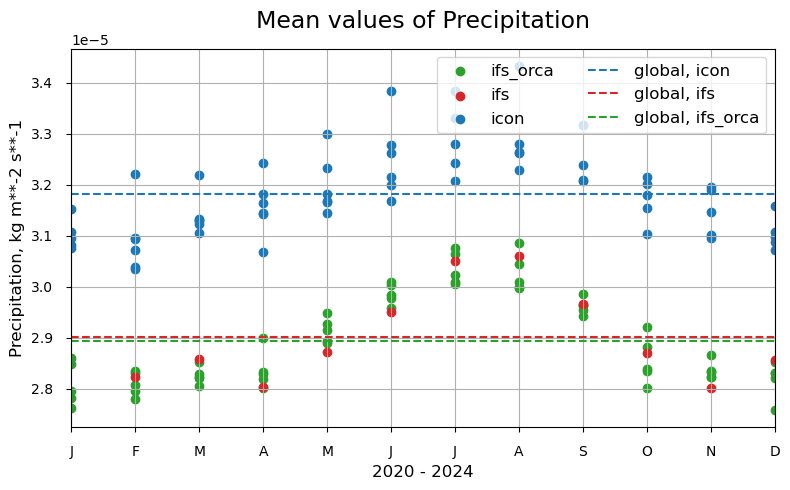

In [43]:

add = diag.mean_and_median_plot(ifs_orca,                   legend='ifs_orca',         color='tab:green')
add = diag.mean_and_median_plot(ifs,        fig=add,        legend='ifs',              color='tab:red')
add = diag.mean_and_median_plot(icon,       fig=add,        legend='icon',             color='tab:blue')
add = diag.mean_and_median_plot(icon,       fig=add, glob=True,  legend='global, icon',     color='tab:blue', ls='--')
add = diag.mean_and_median_plot(ifs,        fig=add, glob=True,  legend='global, ifs',      color='tab:red',  ls='--')
add = diag.mean_and_median_plot(ifs_orca,   fig=add, glob=True,  legend='global, ifs_orca', color='tab:green', ls='--')

### 4.2 Comparison of Mean and Median values 

{<Axes: title={'center': 'Mean values of Precipitation'}, xlabel='2020 - 2025', ylabel='Precipitation, kg m**-2 s**-1'>,
 <Figure size 800x500 with 1 Axes>}

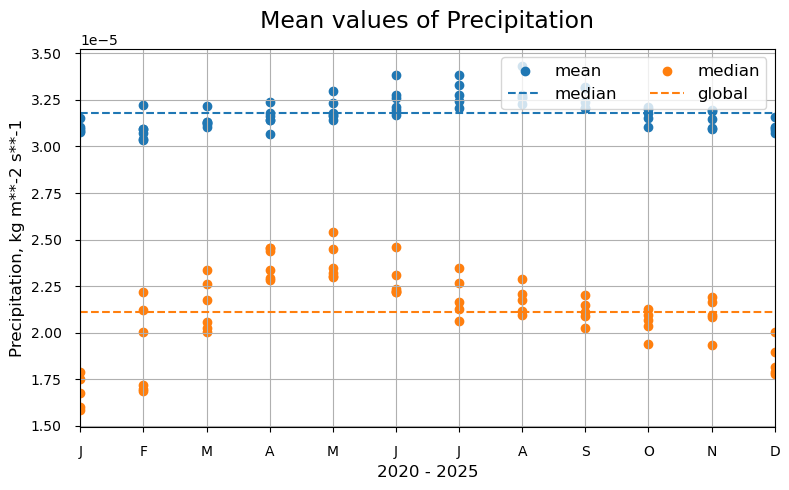

In [45]:
add = diag.mean_and_median_plot(icon,          legend='mean')
add = diag.mean_and_median_plot(icon, fig=add, legend='median',                  glob=True, color='tab:blue',   ls='--')
add = diag.mean_and_median_plot(icon, fig=add, legend='median', get_median=True,            color='tab:orange')
diag.mean_and_median_plot(icon,       fig=add, legend='global', get_median=True, glob=True, color='tab:orange', ls='--')

### 4.3 Along longitude

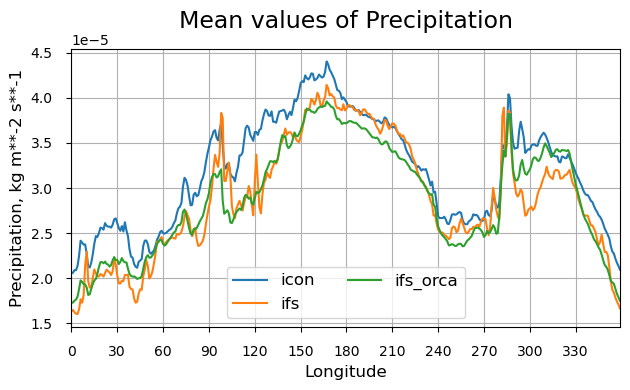

In [40]:
diag.trop_lat = 90
add = diag.mean_and_median_plot(icon,                   coord='lon',  legend='icon',   color='tab:blue', figsize=0.8)

add = diag.mean_and_median_plot(ifs,        fig=add,    coord='lon',  legend='ifs',    color='tab:orange')

add = diag.mean_and_median_plot(ifs_orca,   fig=add,    coord='lon',  legend='ifs_orca', color='tab:green', loc='lower center')


### 4.4 Along latitude

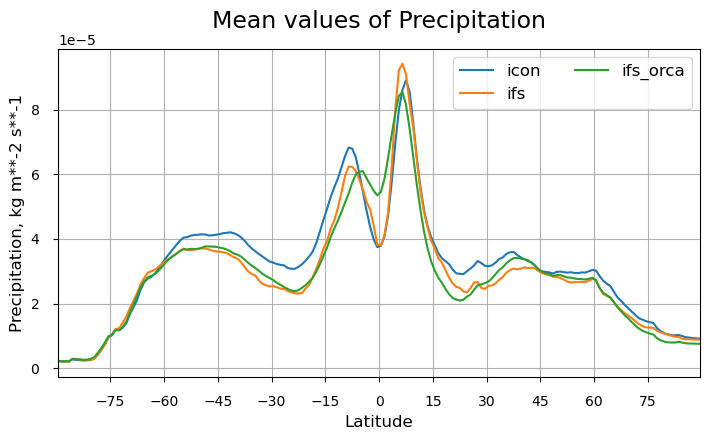

In [39]:
diag.trop_lat = 90
add = diag.mean_and_median_plot(icon,               coord='lat',  legend='icon',    color='tab:blue', figsize=0.9)

add = diag.mean_and_median_plot(ifs,      fig=add,  coord='lat',  legend='ifs',     color='tab:orange')

add = diag.mean_and_median_plot(ifs_orca, fig=add,  coord='lat',  legend='ifs_orca', color='tab:green')


### 4.5 Comparison of Mean Precipitation value for different tropical bands

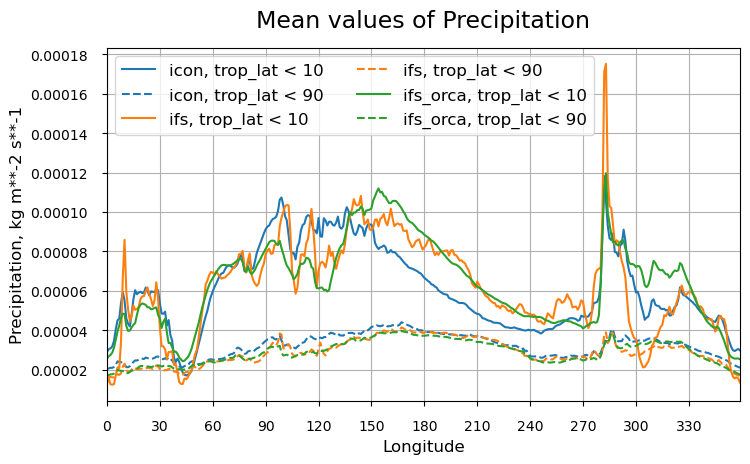

In [38]:
add = diag.mean_and_median_plot(icon,             coord='lon',  legend='icon, trop_lat < 10', trop_lat=10,     color='tab:blue', figsize=0.95)
add = diag.mean_and_median_plot(icon,    fig=add, coord='lon',  legend='icon, trop_lat < 90', trop_lat=90,     color='tab:blue', ls='--')

add = diag.mean_and_median_plot(ifs,     fig=add, coord='lon',  legend='ifs, trop_lat < 10', trop_lat=10,      color='tab:orange')
add = diag.mean_and_median_plot(ifs,     fig=add, coord='lon',  legend='ifs, trop_lat < 90', trop_lat=90,      color='tab:orange', ls='--')

add = diag.mean_and_median_plot(ifs_orca, fig=add, coord='lon',  legend='ifs_orca, trop_lat < 10', trop_lat=10, color='tab:green')
add = diag.mean_and_median_plot(ifs_orca, fig=add, coord='lon',  legend='ifs_orca, trop_lat < 90', trop_lat=90, color='tab:green', ls='--',
                                loc='upper left')

#

##### The end